### **Lab 2: Econometrics**

Import Required Libraries

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import os
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Set working directory (adjust the path accordingly)

In [2]:
#os.chdir('/Users/fabianfuentes/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/cursos/Econometrics/econometrics_mek/Week 2/')

Load data (using pandas instead of foreign library)

In [3]:
jobcorpsfile = "https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%202/data/jobcorps.dta"
JobCorps = pd.read_stata(jobcorpsfile)

Explore data file

In [4]:
# Display the first 5 rows of the DataFrame
JobCorps.head()

,earnq1,earnq2,earnq3,earnq4,earnq5,earnq6,earnq7,earnq8,earnq9,earnq10,...,arrest_bline,jail_bline,participate,voc_in_jc,work_wk48,pct_wks_wrk,logwage_wk208,wagenotmiss,attrit,nomiss
0,0.000000,0.0,0.000000,0.000000,236.988556,227.924026,125.869843,56.596153,0.000000,0.000000,...,0.0,0.0,1.0,1.0,NaN,57.068619,1.945910,1.0,0.0,0.0
1,16.961538,220.5,220.500000,0.000000,0.000000,0.000000,38.032616,215.518158,101.182701,254.130112,...,0.0,0.0,0.0,0.0,1.0,56.730770,2.014903,1.0,0.0,1.0
2,0.000000,0.0,0.000000,308.000000,269.221497,113.192307,0.000000,0.000000,0.000000,104.675995,...,0.0,0.0,1.0,1.0,0.0,37.500000,2.079442,1.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,0.000000,0.0,165.738464,307.799988,71.030769,79.234619,206.009995,107.910004,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,53.365383,2.197225,1.0,0.0,1.0


In [5]:
# Get the dimensions of the DataFrame
JobCorps.shape

(13509, 44)

In [6]:
# Display attributes of the DataFrame
print("Columns:", JobCorps.columns.tolist())  # Column names
print("Index:", JobCorps.index)  # Row indices
print("Data Types:\n", JobCorps.dtypes)  # Data types of each column

Columns: ['earnq1', 'earnq2', 'earnq3', 'earnq4', 'earnq5', 'earnq6', 'earnq7', 'earnq8', 'earnq9', 'earnq10', 'earnq11', 'earnq12', 'earnq13', 'earnq14', 'earnq15', 'earnq16', 'treatmnt', 'dsgn_wgt', 'white', 'black', 'hispanic', 'eng_sec_language', 'havekids_at_bline', 'male', 'educlevel_at_bline', 'hsgrad_at_bline', 'ged_at_bline', 'everwork_at_bline', 'wrk_lyr_bline', 'mos_wrk_lyr_bline', 'earn_lyr_bline', 'wage_bline', 'anywlfr_bline', 'alcohol_bline', 'arrest_bline', 'jail_bline', 'participate', 'voc_in_jc', 'work_wk48', 'pct_wks_wrk', 'logwage_wk208', 'wagenotmiss', 'attrit', 'nomiss']
Index: RangeIndex(start=0, stop=13509, step=1)
Data Types:
 earnq1                float32
earnq2                float32
earnq3                float32
earnq4                float32
earnq5                float32
earnq6                float32
earnq7                float32
earnq8                float32
earnq9                float32
earnq10               float32
earnq11               float32
earnq12   

In [7]:
# Structure of the DataFrame
JobCorps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13509 entries, 0 to 13508
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   earnq1              10566 non-null  float32
 1   earnq2              10543 non-null  float32
 2   earnq3              10593 non-null  float32
 3   earnq4              10674 non-null  float32
 4   earnq5              10866 non-null  float32
 5   earnq6              10787 non-null  float32
 6   earnq7              10769 non-null  float32
 7   earnq8              10791 non-null  float32
 8   earnq9              10842 non-null  float32
 9   earnq10             10895 non-null  float32
 10  earnq11             10889 non-null  float32
 11  earnq12             10783 non-null  float32
 12  earnq13             10776 non-null  float32
 13  earnq14             10808 non-null  float32
 14  earnq15             10854 non-null  float32
 15  earnq16             10692 non-null  float32
 16  trea

In [8]:
# Summary statistics for the DataFrame
print(JobCorps.describe())

             earnq1        earnq2        earnq3        earnq4        earnq5  \
count  10566.000000  10543.000000  10593.000000  10674.000000  10866.000000   
mean      51.349400     69.192497     85.683441     97.254608    111.818680   
std      103.036491    126.829506    137.506317    139.294922    152.092590   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000     20.385044     32.969147   
75%       66.245193    108.716919    150.923080    172.010071    199.534073   
max     2100.000000   2520.000000   2501.584717   2472.120117   2290.679688   

             earnq6        earnq7        earnq8        earnq9       earnq10  \
count  10787.000000  10769.000000  10791.000000  10842.000000  10895.000000   
mean     127.637680    140.062347    149.587372    159.583405    165.357452   
std      172.502609    182.243576    185.673233    

Explore in class characteristics of differnet variables

Compare hispanics in control and treatment group

First compare means


In control group

In [9]:
print(JobCorps[JobCorps['treatmnt'] == 0]['hispanic'].mean())

0.18290661


In [10]:
print(JobCorps[JobCorps['treatmnt'] == 0]['hispanic'].sum())

993.0


In treatment group

In [11]:
print(JobCorps[JobCorps['treatmnt'] == 1]['hispanic'].mean())

0.17580785


In [12]:
print(JobCorps[JobCorps['treatmnt'] == 1]['hispanic'].sum())

1420.0


Difference in means test (using statsmodels.stats.weightstats)

In [13]:
# Calculate means and confidence intervals for "hispanic" by treatment group
treatment_means = JobCorps.groupby('treatmnt').apply(
    lambda group: pd.Series({
        'mean_hispanic': group['hispanic'].mean(skipna=True),
        'ci_lower': group['hispanic'].mean(skipna=True) - t.ppf(0.975, len(group) - 1) * group['hispanic'].std(skipna=True) / np.sqrt(len(group)),
        'ci_upper': group['hispanic'].mean(skipna=True) + t.ppf(0.975, len(group) - 1) * group['hispanic'].std(skipna=True) / np.sqrt(len(group))
    })
).reset_index()

treatment_means

C:\Users\fuent\AppData\Local\Temp\ipykernel_47108\3034697233.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  treatment_means = JobCorps.groupby('treatmnt').apply(


,treatmnt,mean_hispanic,ci_lower,ci_upper
0,0,0.182907,0.172621,0.193192
1,1,0.175808,0.167506,0.184110


In [14]:
# Initialize a list to store the results
results = []

grouped = JobCorps.groupby('treatmnt')

# Iterate through each group to calculate statistics manually
for treatment_type, group in grouped:
    # Remove NaN values
    hispanic_values = group['hispanic'].dropna()
    
    # Sample size (n)
    n = len(hispanic_values)
    
    # Calculate mean
    mean_hispanic = hispanic_values.mean()
    
    # Calculate standard deviation
    std_dev = hispanic_values.std()
    
    # Calculate standard error
    std_error = std_dev / np.sqrt(n)
    
    # Degrees of freedom
    df = n - 1
    
    # Confidence level
    conf_level = 0.95
    t_value = t.ppf((1 + conf_level) / 2, df)  # t-value for 95% CI
    
    # Calculate confidence intervals
    ci_lower = mean_hispanic - t_value * std_error
    ci_upper = mean_hispanic + t_value * std_error
    
    # Append results as a dictionary
    results.append({
        'treatment_type': treatment_type,
        'mean_hispanic': mean_hispanic,
        'ci_lower_hispanic': ci_lower,
        'ci_upper_hispanic': ci_upper
    })

# Step 3: Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

,treatment_type,mean_hispanic,ci_lower_hispanic,ci_upper_hispanic
0,0,0.182907,0.172620,0.193193
1,1,0.175808,0.167505,0.184111


C:\Users\fuent\AppData\Local\Temp\ipykernel_47108\296140929.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


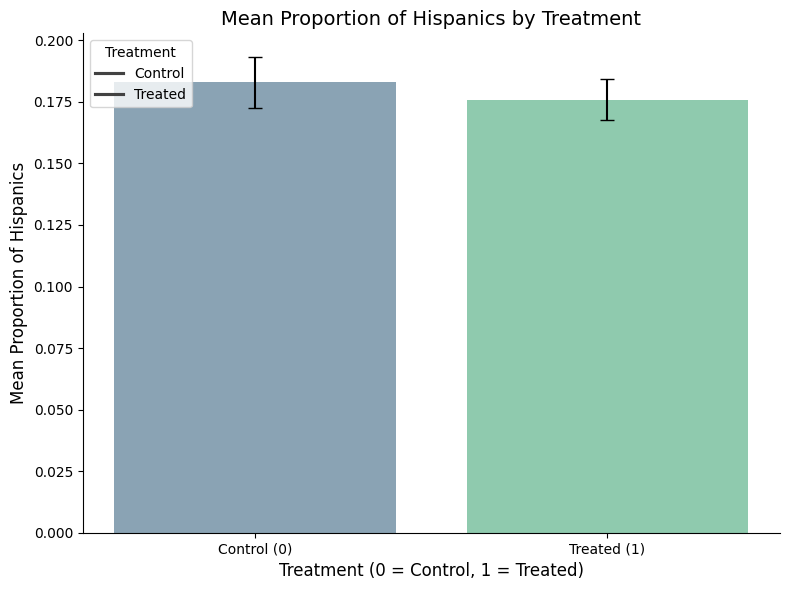

In [15]:
# Bar plot with confidence intervals
plt.figure(figsize=(8, 6))

# Bar plot for mean_hispanic
sns.barplot(
    x='treatmnt',
    y='mean_hispanic',
    data=treatment_means,
    palette='viridis',
    alpha=0.6
)

# Add error bars for confidence intervals
plt.errorbar(
    x=treatment_means['treatmnt'],
    y=treatment_means['mean_hispanic'],
    yerr=[
        treatment_means['mean_hispanic'] - treatment_means['ci_lower'], # Lower error
        treatment_means['ci_upper'] - treatment_means['mean_hispanic']  # Upper error
    ],
    fmt='none',
    capsize=5,
    color='black'
)

# Labels and title
plt.title("Mean Proportion of Hispanics by Treatment", fontsize=14)
plt.xlabel("Treatment (0 = Control, 1 = Treated)", fontsize=12)
plt.ylabel("Mean Proportion of Hispanics", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Control (0)", "Treated (1)"], fontsize=10)
plt.legend(title="Treatment", labels=["Control", "Treated"], loc="upper left")

# Minimal theme
sns.despine()
plt.tight_layout()

plt.show();

C:\Users\fuent\AppData\Local\Temp\ipykernel_47108\2407823232.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
C:\Users\fuent\AppData\Local\Temp\ipykernel_47108\2407823232.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Treatment", loc="upper left")


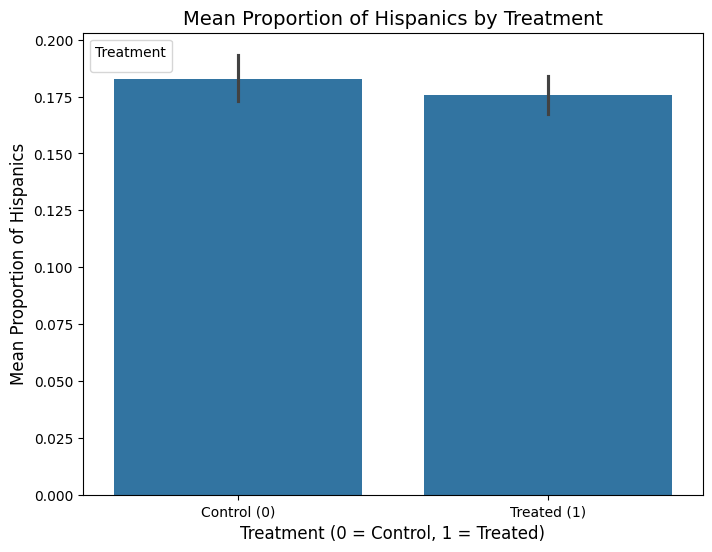

In [16]:
# Bar plot with confidence intervals using Seaborn
plt.figure(figsize=(8, 6))

sns.barplot(
    x="treatmnt", 
    y="hispanic", 
    data=JobCorps, 
    ci=95,                # Add 95% confidence intervals
)

# Add labels and title
plt.title("Mean Proportion of Hispanics by Treatment", fontsize=14)
plt.xlabel("Treatment (0 = Control, 1 = Treated)", fontsize=12)
plt.ylabel("Mean Proportion of Hispanics", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Control (0)", "Treated (1)"], fontsize=10)
plt.legend(title="Treatment", loc="upper left")
plt.show();

In [17]:
from scipy.stats import ttest_ind, t

# Separate the groups
group_0 = JobCorps[JobCorps['treatmnt'] == 0]['hispanic'].dropna()
group_1 = JobCorps[JobCorps['treatmnt'] == 1]['hispanic'].dropna()

# Perform the two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

# Calculate confidence interval for the difference in means
mean_group_0 = group_0.mean()
mean_group_1 = group_1.mean()
mean_diff = mean_group_0 - mean_group_1
std_error = np.sqrt(group_0.var(ddof=1) / len(group_0) + group_1.var(ddof=1) / len(group_1))
df = len(group_0) + len(group_1) - 2
t_crit = t.ppf(0.975, df)  # Two-tailed test at 95% confidence level
ci_lower = mean_diff - t_crit * std_error
ci_upper = mean_diff + t_crit * std_error

# Hypotheses
null_hypothesis = "The means of the two groups are equal (mean_group_0 = mean_group_1)."
alternative_hypothesis = "The means of the two groups are not equal (mean_group_0 ≠ mean_group_1)."

# Decision rule (alpha = 0.05)
alpha = 0.05
decision = "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"

# Display the results
print("Two-Sample T-Test:")
print(f"Hypotheses:")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nResults:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Confidence Interval: [{ci_lower:.8f}, {ci_upper:.8f}]")
print(f"Mean in Group 0: {mean_group_0:.7f}")
print(f"Mean in Group 1: {mean_group_1:.7f}")
print(f"\nDecision: {decision}")

Two-Sample T-Test:
Hypotheses:
Null Hypothesis: The means of the two groups are equal (mean_group_0 = mean_group_1).
Alternative Hypothesis: The means of the two groups are not equal (mean_group_0 ≠ mean_group_1).

Results:
T-Statistic: 1.0527
P-Value: 0.2925
Confidence Interval: [-0.00611954, 0.02031706]
Mean in Group 0: 0.1829066
Mean in Group 1: 0.1758078

Decision: Fail to reject the null hypothesis


In [18]:
# Separate the groups
group_0 = JobCorps[JobCorps['treatmnt'] == 0]['hispanic'].dropna()
group_1 = JobCorps[JobCorps['treatmnt'] == 1]['hispanic'].dropna()

# Perform the two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

# Calculate confidence interval for the difference in means
mean_group_0 = group_0.mean()
mean_group_1 = group_1.mean()
mean_diff = mean_group_0 - mean_group_1
std_error = np.sqrt(group_0.var(ddof=1) / len(group_0) + group_1.var(ddof=1) / len(group_1))
df = len(group_0) + len(group_1) - 2
t_crit = t.ppf(0.975, df)  # Two-tailed test at 95% confidence level
ci_lower = mean_diff - t_crit * std_error
ci_upper = mean_diff + t_crit * std_error

# Hypotheses
null_hypothesis = "The means of the two groups are equal (mean_group_0 = mean_group_1)."
alternative_hypothesis = "The means of the two groups are not equal (mean_group_0 ≠ mean_group_1)."

# Decision rule (alpha = 0.05)
alpha = 0.05
decision = "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"

# Display the results
print("Two-Sample T-Test:")
print(f"Hypotheses:")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nResults:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Confidence Interval: [{ci_lower:.8f}, {ci_upper:.8f}]")
print(f"Mean in Group 0: {mean_group_0:.7f}")
print(f"Mean in Group 1: {mean_group_1:.7f}")
print(f"\nDecision: {decision}")

Two-Sample T-Test:
Hypotheses:
Null Hypothesis: The means of the two groups are equal (mean_group_0 = mean_group_1).
Alternative Hypothesis: The means of the two groups are not equal (mean_group_0 ≠ mean_group_1).

Results:
T-Statistic: 1.0527
P-Value: 0.2925
Confidence Interval: [-0.00611954, 0.02031706]
Mean in Group 0: 0.1829066
Mean in Group 1: 0.1758078

Decision: Fail to reject the null hypothesis


use OLS model to see of randomization was sucessful

 first define vector of variables of interest

In [19]:
# Select column names from index 19 to 36 (Python uses 0-based indexing)
target_vars = JobCorps.columns[18:36].to_list()
target_vars

['white',
 'black',
 'hispanic',
 'eng_sec_language',
 'havekids_at_bline',
 'male',
 'educlevel_at_bline',
 'hsgrad_at_bline',
 'ged_at_bline',
 'everwork_at_bline',
 'wrk_lyr_bline',
 'mos_wrk_lyr_bline',
 'earn_lyr_bline',
 'wage_bline',
 'anywlfr_bline',
 'alcohol_bline',
 'arrest_bline',
 'jail_bline']

In [33]:
# Exclude columns containing "earnq"
target_vars = [var for var in target_vars if var != 'treatmnt']
target_vars

['dsgn_wgt',
 'white',
 'black',
 'hispanic',
 'eng_sec_language',
 'havekids_at_bline',
 'male',
 'educlevel_at_bline',
 'hsgrad_at_bline',
 'ged_at_bline',
 'everwork_at_bline',
 'wrk_lyr_bline',
 'mos_wrk_lyr_bline',
 'earn_lyr_bline',
 'wage_bline',
 'anywlfr_bline',
 'alcohol_bline',
 'arrest_bline',
 'jail_bline',
 'participate',
 'voc_in_jc',
 'work_wk48',
 'pct_wks_wrk',
 'logwage_wk208',
 'wagenotmiss',
 'attrit',
 'nomiss']

In [21]:
# Summary statistics for the selected columns
JobCorps[target_vars].describe()

,treatmnt,dsgn_wgt,white,black,hispanic,eng_sec_language,havekids_at_bline,male,educlevel_at_bline,hsgrad_at_bline,...,arrest_bline,jail_bline,participate,voc_in_jc,work_wk48,pct_wks_wrk,logwage_wk208,wagenotmiss,attrit,nomiss
count,13509.000000,13509.000000,13506.000000,13506.000000,13506.000000,13477.000000,13409.000000,13509.000000,13484.000000,13444.000000,...,13498.000000,12882.000000,11015.000000,10949.000000,10666.000000,10610.000000,9296.000000,11094.000000,13509.000000,13509.000000
mean,0.598046,10.581876,0.264697,0.483785,0.178661,0.142688,0.191215,0.602487,10.081282,0.182163,...,0.262020,0.070486,0.446301,0.376655,0.601631,45.846565,2.064566,0.837930,0.178770,0.556740
std,0.490311,3.199731,0.441188,0.499756,0.383083,0.349767,0.393273,0.489402,1.525547,0.385993,...,0.439562,0.255974,0.497131,0.484569,0.489585,26.651600,0.449281,0.368531,0.383174,0.496789
min,0.000000,3.233516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.162017,0.000000,0.000000,0.000000
25%,0.000000,8.972280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.961538,1.832582,1.000000,0.000000,0.000000
50%,1.000000,9.307692,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,45.673077,2.034706,1.000000,0.000000,1.000000
75%,1.000000,12.496587,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,...,0.987923,0.000000,1.000000,1.000000,1.000000,64.903847,2.251292,1.000000,0.000000,1.000000
max,1.000000,19.994539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,6.214608,1.000000,1.000000,1.000000


In [22]:
# Select specific columns and calculate the correlation matrix
cor_matrix = JobCorps[["white", "black", "hispanic", "treatmnt"]].corr()
cor_matrix

,white,black,hispanic,treatmnt
white,1.000000,-0.580835,-0.279831,0.004806
black,-0.580835,1.000000,-0.451508,0.002861
hispanic,-0.279831,-0.451508,1.000000,-0.009086
treatmnt,0.004806,0.002861,-0.009086,1.000000


<Axes: >

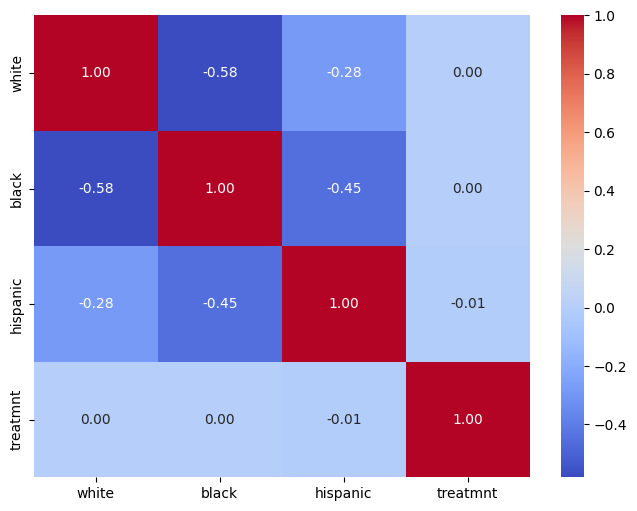

In [23]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cor_matrix, 
    annot=True,          # Display correlation coefficients on the heatmap
    fmt=".2f",           # Format for the annotations
    cmap="coolwarm",     # Color map for the heatmap
    cbar=True            # Display color bar
)

Run the regression, first a simple example with 3 observable caracteristics

In [24]:
model1 = smf.ols('treatmnt ~ white + black + hispanic', data=JobCorps).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               treatmnt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4010
Date:                Fri, 17 Jan 2025   Prob (F-statistic):              0.752
Time:                        19:09:28   Log-Likelihood:                -9537.2
No. Observations:               13506   AIC:                         1.908e+04
Df Residuals:                   13502   BIC:                         1.911e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5976      0.016     38.228      0.0

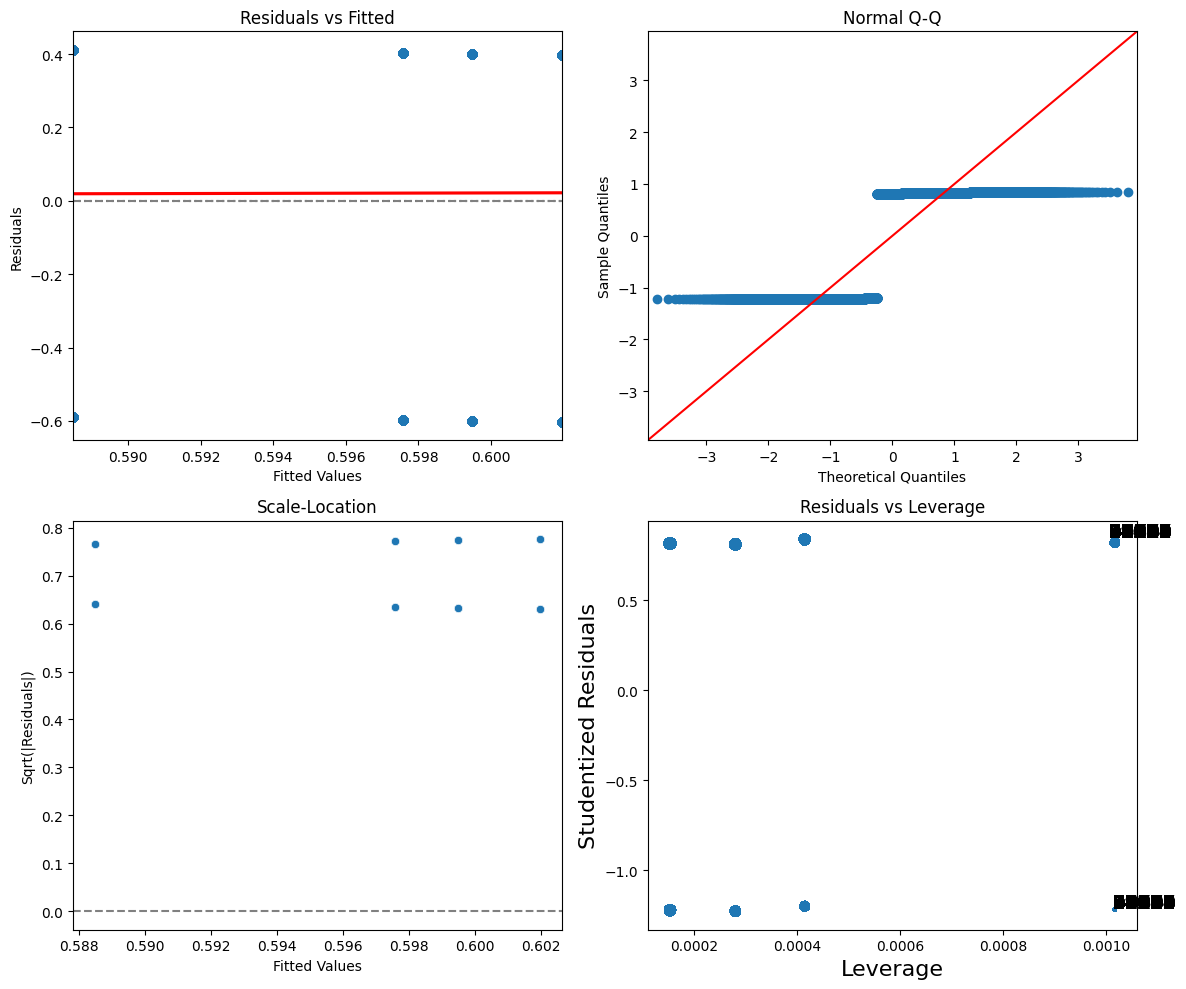

In [25]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Residual Plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, line_kws={'color': 'red'}, ax=ax[0, 0])
ax[0, 0].axhline(0, color='gray', linestyle='--')
ax[0, 0].set_title("Residuals vs Fitted")
ax[0, 0].set_xlabel("Fitted Values")
ax[0, 0].set_ylabel("Residuals")

# Normal Q-Q
sm.qqplot(model1.resid, line="45", fit=True, ax=ax[0, 1])
ax[0, 1].set_title("Normal Q-Q")

# Scale-Location (Spread-Location)
abs_resid = abs(model1.resid)**0.5
sns.scatterplot(x=model1.fittedvalues, y=abs_resid, ax=ax[1, 0])
ax[1, 0].axhline(0, color='gray', linestyle='--')
ax[1, 0].set_title("Scale-Location")
ax[1, 0].set_xlabel("Fitted Values")
ax[1, 0].set_ylabel("Sqrt(|Residuals|)")

# Residuals vs Leverage
sm.graphics.influence_plot(model1, criterion="cooks", size=2, ax=ax[1, 1])
ax[1, 1].set_title("Residuals vs Leverage")

plt.tight_layout()
plt.show()

Now all variables

First save the model

In [34]:
# Dynamically create the formula
dependent_var = "treatmnt"
formula_model2 = f"{dependent_var} ~ {' + '.join(target_vars)}"
formula_model2

'treatmnt ~ dsgn_wgt + white + black + hispanic + eng_sec_language + havekids_at_bline + male + educlevel_at_bline + hsgrad_at_bline + ged_at_bline + everwork_at_bline + wrk_lyr_bline + mos_wrk_lyr_bline + earn_lyr_bline + wage_bline + anywlfr_bline + alcohol_bline + arrest_bline + jail_bline + participate + voc_in_jc + work_wk48 + pct_wks_wrk + logwage_wk208 + wagenotmiss + attrit + nomiss'

Second run regression

In [35]:
# Fit the model using the dynamically created formula
model2 = smf.ols(formula=formula_model2, data=JobCorps).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               treatmnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     489.8
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:37:16   Log-Likelihood:                -238.29
No. Observations:                4292   AIC:                             524.6
Df Residuals:                    4268   BIC:                             677.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3538      0

Selection on observables


In [37]:
dependent_var = "attrit"
formula_model3 = f"{dependent_var} ~ {' + '.join(target_vars)}"
formula_model3

'attrit ~ dsgn_wgt + white + black + hispanic + eng_sec_language + havekids_at_bline + male + educlevel_at_bline + hsgrad_at_bline + ged_at_bline + everwork_at_bline + wrk_lyr_bline + mos_wrk_lyr_bline + earn_lyr_bline + wage_bline + anywlfr_bline + alcohol_bline + arrest_bline + jail_bline + participate + voc_in_jc + work_wk48 + pct_wks_wrk + logwage_wk208 + wagenotmiss + attrit + nomiss'

In [40]:
model3 = smf.ols(formula=formula_model3, data=JobCorps).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 attrit   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 Jan 2025   Prob (F-statistic):                nan
Time:                        21:42:05   Log-Likelihood:                    inf
No. Observations:                4292   AIC:                              -inf
Df Residuals:                    4268   BIC:                              -inf
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept                   0       

c:\Users\fuent\miniconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\fuent\miniconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1871: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
c:\Users\fuent\miniconda3\Lib\site-packages\statsmodels\regression\linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\fuent\miniconda3\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [41]:
# Filter rows with complete cases for the specified columns
test = JobCorps.dropna(subset=target_vars)
test.shape

(4292, 44)

In [42]:
cor_matrix = test[target_vars].corr()
cor_matrix

,dsgn_wgt,white,black,hispanic,eng_sec_language,havekids_at_bline,male,educlevel_at_bline,hsgrad_at_bline,ged_at_bline,...,arrest_bline,jail_bline,participate,voc_in_jc,work_wk48,pct_wks_wrk,logwage_wk208,wagenotmiss,attrit,nomiss
dsgn_wgt,1.000000,0.051271,-0.044102,-0.006008,-0.005157,-0.078487,-0.094027,-0.008222,-0.008325,0.013889,...,-0.010732,-0.016866,-0.512269,-0.456730,-0.040633,0.022303,-0.038002,NaN,NaN,-0.020952
white,0.051271,1.000000,-0.615645,-0.304754,-0.235692,-0.162022,0.121506,-0.047786,-0.003792,0.107477,...,0.073562,0.050526,-0.006578,-0.008534,0.058077,0.125648,0.074762,NaN,NaN,-0.011255
black,-0.044102,-0.615645,1.000000,-0.413325,-0.292002,0.149259,-0.115792,0.064647,0.021920,-0.109020,...,-0.060132,-0.044506,-0.001221,-0.006105,-0.053010,-0.103921,-0.105433,NaN,NaN,0.004309
hispanic,-0.006008,-0.304754,-0.413325,1.000000,0.532580,0.037651,-0.009811,-0.013573,-0.036263,0.022413,...,-0.010064,-0.018460,-0.006994,0.003883,0.016821,0.001221,0.029608,NaN,NaN,0.016438
eng_sec_language,-0.005157,-0.235692,-0.292002,0.532580,1.000000,-0.017210,0.008348,-0.006056,0.006534,0.003356,...,-0.055745,-0.040994,0.003538,0.012273,0.035344,0.009610,0.025181,NaN,NaN,0.010682
havekids_at_bline,-0.078487,-0.162022,0.149259,0.037651,-0.017210,1.000000,-0.225616,0.060045,0.026873,0.054102,...,-0.017819,0.018781,-0.035415,-0.044076,-0.032163,-0.018635,-0.032386,NaN,NaN,0.025311
male,-0.094027,0.121506,-0.115792,-0.009811,0.008348,-0.225616,1.000000,-0.122952,-0.143765,0.010671,...,0.157664,0.104234,0.003746,-0.003204,0.031367,0.081746,0.111734,NaN,NaN,-0.036258
educlevel_at_bline,-0.008222,-0.047786,0.064647,-0.013573,-0.006056,0.060045,-0.122952,1.000000,0.660831,-0.002526,...,-0.148225,-0.070540,-0.042448,-0.040808,0.099969,0.218409,0.078221,NaN,NaN,0.055976
hsgrad_at_bline,-0.008325,-0.003792,0.021920,-0.036263,0.006534,0.026873,-0.143765,0.660831,1.000000,-0.149060,...,-0.150530,-0.057382,-0.023782,-0.019251,0.093926,0.208390,0.053992,NaN,NaN,0.050506
ged_at_bline,0.013889,0.107477,-0.109020,0.022413,0.003356,0.054102,0.010671,-0.002526,-0.149060,1.000000,...,0.041097,0.030491,-0.022097,-0.020030,0.008129,0.060191,0.042288,NaN,NaN,0.015615


Average Treatment Effect

In [44]:
# Define the formula
formula_model_ATE = "earnq16 ~ treatmnt"
formula_model_ATE

'earnq16 ~ treatmnt'

In [43]:
model_ATE = smf.ols('earnq16 ~ treatmnt', data=JobCorps).fit()
print(model_ATE.summary())

                            OLS Regression Results                            
Dep. Variable:                earnq16   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.671
Date:                Fri, 17 Jan 2025   Prob (F-statistic):            0.00188
Time:                        21:45:10   Log-Likelihood:                -72524.
No. Observations:               10692   AIC:                         1.451e+05
Df Residuals:                   10690   BIC:                         1.451e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    201.3131      3.289     61.200      0.0

Is this a really ATE ?

Effect on the Treated

In [45]:
JobCorps.loc[JobCorps['treatmnt'] == 1, 'earnq16'].describe()

count    6475.000000
mean      214.457977
std       219.324020
min         0.000000
25%         0.000000
50%       196.425858
75%       335.443146
max      1970.444824
Name: earnq16, dtype: float64

Average Effect of Treatment on the Treated (ToT)


In [48]:
ToT = JobCorps[JobCorps['treatmnt'] == 1]['earnq16'].mean()
ToT

np.float32(214.45798)

In [50]:
NT = JobCorps[JobCorps['treatmnt'] == 0]['earnq16'].mean()
NT

np.float32(201.31308)

In [51]:
print(ToT - NT)

13.144897


Compare with regression coefficient

In [52]:
print(model_ATE.params)

Intercept    201.313081
treatmnt      13.144888
dtype: float64


Check for correlation between residuals and treatment

In [53]:
print(model_ATE.resid.corr(JobCorps['treatmnt'].dropna()))

1.0858299576353128e-16


no correlation at all, what does this mean?